<a href="https://colab.research.google.com/github/SergioaA64/SergioaA64/blob/main/12-RelatorioFinal_D6_RAFAEL_GARCIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Especialização em Ciência de Dados aplicada a Políticas Públicas - ENAP

Disciplina: **D6 - Estatística Descritiva**

Aluno: **Rafael Leal Garcia**

Professor: **Eduardo Monteiro Gomes**

**1. CONTEXTUALIZAÇÃO DO PROBLEMA**
---

As ações de fiscalização ambiental consistem no dever do poder público de fiscalizar as condutas daqueles que se apresentem como potenciais ou efetivos poluidores e utilizadores dos recursos naturais, de forma a garantir a preservação do meio ambiente para a coletividade.

Do ponto de vista de políticas públicas, essas ações buscam atender ao eixo de monitoramento e controle de Planos de Ação para Prevenção e Combate ao Desmatamento Ambiental em grandes biomas brasileiros, como Amazônia (PPCDAm) e Cerrado (PPCerrado), e faz parte da Política Nacional sobre Mudança do Clima (PNMC). Ao reduzir o desmatamento, por meio de ações de fiscalização ambiental, reduz-se a ação antrópica fortemente relacionada às mudanças climáticas e seus efeitos negativos.

Para o projeto de conclusão do curso, minha proposta inicial (ainda a ser confirmada) seria a de propor uma estratégia eficiente para eliminação, ou redução, do passivo de processos de autos de infração do Ibama pendentes de conclusão.

De acordo com relatório de auditoria da CGU, o Ibama possuía, até dezembro de 2017, um estoque de cerca de 126 mil processos em aberto tramitando no órgão.

A proposta então seria fazer um estudo na base de dados desses processos, aplicando técnicas de Clusterização com Machine Learning a partir de algumas características, tais como: valor da multa, tipo e complexidade da infração, existência da apresentação de defesa ou recurso pelo autuado, capacidade operacional de unidade responsável pela tramitação/julgamento do auto de infração, fase atual de tramitação, entre outras, com o intuito de elaborar uma possível estratégia eficiente para eliminação deste passivo.

No entanto, nesse momento a base de dados com os processos em tramitação no Ibama não estava disponível. Assim, nessa primeira etapa realizou-se uma análise estatística descritiva sobre o universo de Autos de Infração lavrados pelo Ibama, haja vista que, posteriormente, para cada AI será aberto um processo administrativo, que obrigatoriamente deverá ser julgado.

**2. IMPORTAÇÃO DOS DADOS**
---
Para a carga de dados, foram utilizados dados disponibilizados pelo Ibama em seu Portal de Dados Abertos (http://www.ibama.gov.br/dados-abertos).

URL: 'http://dadosabertos.ibama.gov.br/dados/SIFISC/auto_infracao/auto_infracao/auto_infracao.csv'

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as pp

from pandas.tseries.offsets import MonthEnd
from google.colab import drive
drive.mount('/drive', force_remount=True)

from datetime import datetime

Mounted at /drive


In [ ]:
#----------------------------------------------------------------------------------------------------
# Arquivo/pasta do GoogleDrive contendo os dados dos autos de infração registrados no sistema de fiscalização do Ibama.
#----------------------------------------------------------------------------------------------------
s_googlepath_entrada = '/drive/My Drive/Ciencia_de_dados/D6/'
s_arquivo_entrada = 'auto_infracao.csv'

#-----------------------------------------------------------------------------
# Carrega o arquivo com os dados dos autos de infração
#-----------------------------------------------------------------------------
df_importacao = pd.read_csv(s_googlepath_entrada + s_arquivo_entrada, 
                            sep=';', decimal= ',', thousands='.', skiprows=0, encoding='utf-8', 
                            dtype = {'COD_MUNICIPIO': str, 'COD_INFRACAO': str, 'ACAO_FISCALIZATORIA': str, 'NUM_PROCESSO': str})
                       #dtype={'Pat. Líq.':'float','Receita Líq.':'float', 'EBITDA':'float', 'Res. Fin.':'float', 'Lucro Líq.':'float'})


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (0,1,2,6,7,24,25,29,32,33,34,35,37,38,40) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
# Qtde de linhas e colunas importada
df_importacao.shape

(611066, 42)

In [ ]:
df_importacao.head()

,SEQ_AUTO_INFRACAO,NUM_AUTO_INFRACAO,SER_AUTO_INFRACAO,TIPO_AUTO,TIPO_MULTA,VAL_AUTO_INFRACAO,PATRIMONIO_APURACAO,GRAVIDADE_INFRACAO,UNID_ARRECADACAO,DES_AUTO_INFRACAO,DAT_HORA_AUTO_INFRACAO,FORMA_ENTREGA,DAT_CIENCIA_AUTUACAO,COD_MUNICIPIO,MUNICIPIO,UF,NUM_PROCESSO,COD_INFRACAO,DES_INFRACAO,TIPO_INFRACAO,NOME_INFRATOR,CPF_CNPJ_INFRATOR,QTD_AREA,INFRACAO_AREA,DES_OUTROS_TIPO_AREA,CLASSIFICACAO_AREA,NUM_LATITUDE_AUTO,NUM_LONGITUDE_AUTO,DES_LOCAL_INFRACAO,NOTIFICACAO_VINCULADA,ACAO_FISCALIZATORIA,UNID_CONTROLE,TIPO_ACAO,OPERACAO,DENUNCIA_SISLIV,ORDEM_FISCALIZACAO,SOLICITACAO_RECURSO,OPERACAO_SOL_RECURSO,DAT_LANCAMENTO,DAT_ULT_ALTERACAO,TIPO_ULT_ALTERACAO,ULTIMA_ATUALIZACAO_RELATORIO
0,3,26363,D,Multa simples,NaN,1500.0,NaN,NaN,IMP/GEREX,POR FUNCIONAR ESTABELICIMENTO PONTENCIALMENTE ...,05/03/2004 00:00:00,NaN,05/03/2004,2105302,IMPERATRIZ,MA,0205100001204,"401001,0",Funcionar sem prévio registro no Ibama - Admin...,Penalidade pecuniária - Flora,PALADAR IOGURTE LTDA,01790868000103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,NaN,IMP/GEREX,Rotina,NaN,/,NaN,NaN,NaN,01/06/2004 10:13:30,06/09/2010 10:09:03,Preenchido,05/09/2021 19:00
1,4,26364,D,Multa simples,NaN,1500.0,NaN,NaN,IMP/GEREX,POR FUCIONAR ESTABELECIMENTO POTENCIALMENTE PO...,05/03/2004 00:00:00,NaN,05/03/2004,2105302,IMPERATRIZ,MA,0205100001104,"606002,0",Exercer atividade potencialmente degradadora e...,Penalidade pecuniária - Controle ambiental,PALADAR IOGURTE LTDA,01790868000103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,NaN,IMP/GEREX,NaN,NaN,/,NaN,NaN,NaN,01/06/2004 10:01:11,01/06/2004 10:01:11,Preenchido,05/09/2021 19:00
2,5,26365,D,Multa simples,NaN,2500.0,NaN,NaN,IMP/GEREX,por fucionar estabelecimento potencialmente po...,11/05/2004 00:00:00,NaN,11/05/2004,2100600,AMARANTE DO MARANHAO,MA,0205100007104,"401001,0",Funcionar sem prévio registro no Ibama - Admin...,Penalidade pecuniária - Flora,CERAMICA GABRIELA LTDA - ME,04352741000192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,NaN,IMP/GEREX,NaN,NaN,/,NaN,NaN,NaN,12/07/2004 11:58:19,12/07/2004 11:58:19,Preenchido,05/09/2021 19:00
3,7,26367,D,Multa simples,NaN,200.0,NaN,NaN,IMP/GEREX,"POR COMERCIALIZAR PRODUTOS FLORESTAIS, A SABER...",04/11/2004 10:00:00,NaN,NaN,2104057,ESTREITO,MA,0205100026204,"422001,0",Vender ou expor à venda produto florestal sem ...,Penalidade pecuniária - Flora,Deusivan Cavalcante Ferreira,***909373**,NaN,NaN,NaN,NaN,-6.71944,-47.42919,NaN,-,NaN,IMP/GEREX,NaN,NaN,/,NaN,NaN,NaN,07/10/2005 17:14:21,23/04/2009 15:53:12,Preenchido,05/09/2021 19:00
4,9,26369,D,Multa simples,NaN,600.0,NaN,NaN,IMP/GEREX,Por comercializar produtos florestais a saber:...,04/11/2004 00:00:00,NaN,NaN,2104057,ESTREITO,MA,0205100026304,"422001,0",Receber e comercializar produto florestal sem ...,Penalidade pecuniária - Flora,FRANCISCO COELHO DA SILVA,***185942**,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,NaN,IMP/GEREX,NaN,NaN,/,NaN,NaN,NaN,25/05/2005 10:08:53,25/05/2005 10:08:53,Preenchido,05/09/2021 19:00


**Dicionário de dados:**

SEQ_AUTO_INFRACAO - *Chave primária (número sequencial) que identifica o auto de infração*
NUM_AUTO_INFRACAO - *Número impresso no formulário que compõe a identificação do documento juntamente com a série do auto*

SER_AUTO_INFRACAO - *Caractere impresso no formulário que compõe a identificação do documento juntamente com o número do auto*

TIPO_AUTO - *Tipo de sanção proposta no auto: multa simples; multa diária; advertência (sem sanção pecuniária)*

TIPO_MULTA - *Especifica se o dispositivo legal da multa aplicada prevê um valor fixo por unidade (multa fechada) ou se há uma faixa de valores aplicável dependendo da capacidade econômica do infrator e gravidade da infração (multa aberta)*

VAL_AUTO_INFRACAO - *Valor de multa indicado inicialmente pelo agente ambiental*

PATRIMONIO_APURACAO - *Forma de apuração do patrimônio da pessoa física ou porte de pessoa jurídica autuada (capacidade aparente ou patrimônio comprovado)*

GRAVIDADE_INFRACAO - *Gravidade da infração ambiental constatada: Leve, Médio, Grave*

UNID_ARRECADACAO - *Unidade de arrecadação*

DES_AUTO_INFRACAO - *Descrição do fato infracional*

DAT_HORA_AUTO_INFRACAO - *Data e horário da lavratura do formulário*

FORMA_ENTREGA - *Meio empregado para dar ciência do auto de infração ao autuado: pessoalmente; representante; aviso de recebimento (AR); edital; o autuado recusou-se a assinar*

DAT_CIENCIA_AUTUACAO - Data em que o autuado tomou ciência do auto de infração

COD_MUNICIPIO - Código do município (IBGE) de ocorrência da infração.

MUNICIPIO - Nome do município de ocorrência da infração

UF - Sigla da unidade da federação de ocorrência da infração

NUM_PROCESSO - Número do processo administrativo do Ibama em que será processado o julgamento do auto e demais medidas adotadas vinculadas ao mesmo fato infracional

COD_INFRACAO - Código do tipo infracional de acordo com o dispositivo legal que prevê a conduta da infração constatada

DES_INFRACAO - Descrição do tipo infracional de acordo com o dispositivo legal que prevê a conduta da infração constatada

TIPO_INFRACAO - Classifica a infração a partir do código do tipo: cadastro técnico federal; controle ambiental; ecossistema; fauna; flora; ordenamento urbano e contr. patrim.; org. gen. modific. E biopirataria; pesca; unidades de conservação; outras

NOME_INFRATOR - Nome da pessoa autuada indicada no auto de infração como infrator

CPF_CNPJ_INFRATOR - Número de Cadastro Nacional de Pessoa Jurídica (CNPJ) ou Cadastro de Pessoa Física (CPF) do infrator

QTD_AREA - Extensão em hectares da área objeto de autuação

TIPO_INFRACAO_AREA - Tipo de infração vinculada à área objeto da infração: desmatamento; queimadas; outras



DES_OUTROS_TIPO_AREA - Especifica outra infração vinculada à área quando não se trata de desmatamento ou queimada
CLASSIFICACAO_AREA - Tipo de área objeto da infração

NUM_LATITUDE_AUTO - Latitude de ocorrência do fato infracional

NUM_LONGITUDE_AUTO - Longitude de ocorrência do fato infracional

DES_LOCAL_INFRACAO - Descrição do local de ocorrência do fato infracional


NOTIFICACAO_VINCULADA - Número e série de notificação vinculada ao auto de infração

ACAO_FISCALIZATORIA - Número da ação fiscalizatória de origem do auto de infração

UNIDADE - Unidade de fiscalização responsável pelo auto de infração

TIPO_ACAO - Motivação da ação fiscalizatória: operação; fortuito; rotina; demanda jurídica/Ministério Público; linha verde (denúncia Sisliv)

OPERACAO - Nome da operação de fiscalização

DENUNCIA_SISLIV - Número da ocorrência registrada no sistema Linha Verde de ouvidoria, que motivou a a ação fiscalizatória

ORDEM_FISCALIZACAO - Ordem de fiscalização que motivou a ação fiscalizatória


SOLICITACAO_RECURSO - Número da solicitação de recurso vinculada à ordem de fiscalização

OPERACAO_SOL_RECURSO - Nome da operação de fiscalização prevista na solicitação de recurso

DAT_LANCAMENTO - Data em que o formulário foi lançado no sistema de fiscalização (auto analógico), ou gerado no aparelho PDA (auto de infração eletrônico)
DAT_ULT_ALTERACAO - Data da ultima alteração
TIPO_ULT_ALTERACAO - Tipo da última alteração

In [ ]:
df_importacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611066 entries, 0 to 611065
Data columns (total 42 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SEQ_AUTO_INFRACAO             604734 non-null  object 
 1   NUM_AUTO_INFRACAO             611066 non-null  object 
 2   SER_AUTO_INFRACAO             590414 non-null  object 
 3   TIPO_AUTO                     611026 non-null  object 
 4   TIPO_MULTA                    101874 non-null  object 
 5   VAL_AUTO_INFRACAO             607824 non-null  float64
 6   PATRIMONIO_APURACAO           2874 non-null    object 
 7   GRAVIDADE_INFRACAO            10823 non-null   object 
 8   UNID_ARRECADACAO              604734 non-null  object 
 9   DES_AUTO_INFRACAO             596376 non-null  object 
 10  DAT_HORA_AUTO_INFRACAO        611053 non-null  object 
 11  FORMA_ENTREGA                 136982 non-null  object 
 12  DAT_CIENCIA_AUTUACAO          353009 non-nul

In [ ]:
df_autos_infracao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440955 entries, 0 to 604720
Data columns (total 29 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   SEQ_AUTO_INFRACAO       440955 non-null  object        
 1   NUM_AUTO_INFRACAO       440955 non-null  object        
 2   DAT_HORA_AUTO_INFRACAO  440955 non-null  datetime64[ns]
 3   TIPO_AUTO               440955 non-null  object        
 4   TIPO_MULTA              94993 non-null   object        
 5   VAL_AUTO_INFRACAO       440955 non-null  float64       
 6   UNID_ARRECADACAO        440955 non-null  object        
 7   COD_MUNICIPIO           440955 non-null  object        
 8   MUNICIPIO               440955 non-null  object        
 9   UF                      440955 non-null  object        
 10  FORMA_ENTREGA           129945 non-null  object        
 11  DAT_CIENCIA_AUTUACAO    327741 non-null  datetime64[ns]
 12  NUM_PROCESSO            435360

**3. LIMPEZA E AJUSTE DO CONJUNTO DE DADOS**
---

Após uma visão geral dos dados, combinado com a análise semântica das colunas a partir do dicionário de dados, selecionou-se em um DataFrame apenas as colunas que seriam úteis para o estudo.

Verificou-se também que alguns campos possuíam poucos registros preenchidos (< 5% do total de registros).
Deste modo, também foram descartados:

 6   PATRIMONIO_APURACAO           2874 non-null    object 

 7   GRAVIDADE_INFRACAO            10823 non-null   object 

 24  DES_OUTROS_TIPO_AREA          82 non-null      object


In [ ]:
# Dataframe contendo apenas as colunas interessantes para o estudo
df_autos_infracao = df_importacao[['SEQ_AUTO_INFRACAO', 'NUM_AUTO_INFRACAO', 'DAT_HORA_AUTO_INFRACAO', 'TIPO_AUTO', 'TIPO_MULTA', 'VAL_AUTO_INFRACAO', 
                                   'UNID_ARRECADACAO', 'COD_MUNICIPIO', 'MUNICIPIO', 'UF', 'FORMA_ENTREGA', 'DAT_CIENCIA_AUTUACAO', 
                                   'NUM_PROCESSO', 'NOME_INFRATOR', 'CPF_CNPJ_INFRATOR', 'CLASSIFICACAO_AREA', 
                                   'COD_INFRACAO', 'TIPO_INFRACAO', 'ACAO_FISCALIZATORIA', 'UNID_CONTROLE', 'TIPO_ACAO']]
df_autos_infracao.head()

,SEQ_AUTO_INFRACAO,NUM_AUTO_INFRACAO,DAT_HORA_AUTO_INFRACAO,TIPO_AUTO,TIPO_MULTA,VAL_AUTO_INFRACAO,UNID_ARRECADACAO,COD_MUNICIPIO,MUNICIPIO,UF,FORMA_ENTREGA,DAT_CIENCIA_AUTUACAO,NUM_PROCESSO,NOME_INFRATOR,CPF_CNPJ_INFRATOR,CLASSIFICACAO_AREA,COD_INFRACAO,TIPO_INFRACAO,ACAO_FISCALIZATORIA,UNID_CONTROLE,TIPO_ACAO,OPERACAO,ORDEM_FISCALIZACAO
0,3,26363,05/03/2004 00:00:00,Multa simples,NaN,1500.0,IMP/GEREX,2105302,IMPERATRIZ,MA,NaN,05/03/2004,0205100001204,PALADAR IOGURTE LTDA,01790868000103,NaN,"401001,0",Penalidade pecuniária - Flora,NaN,IMP/GEREX,Rotina,NaN,NaN
1,4,26364,05/03/2004 00:00:00,Multa simples,NaN,1500.0,IMP/GEREX,2105302,IMPERATRIZ,MA,NaN,05/03/2004,0205100001104,PALADAR IOGURTE LTDA,01790868000103,NaN,"606002,0",Penalidade pecuniária - Controle ambiental,NaN,IMP/GEREX,NaN,NaN,NaN
2,5,26365,11/05/2004 00:00:00,Multa simples,NaN,2500.0,IMP/GEREX,2100600,AMARANTE DO MARANHAO,MA,NaN,11/05/2004,0205100007104,CERAMICA GABRIELA LTDA - ME,04352741000192,NaN,"401001,0",Penalidade pecuniária - Flora,NaN,IMP/GEREX,NaN,NaN,NaN
3,7,26367,04/11/2004 10:00:00,Multa simples,NaN,200.0,IMP/GEREX,2104057,ESTREITO,MA,NaN,NaN,0205100026204,Deusivan Cavalcante Ferreira,***909373**,NaN,"422001,0",Penalidade pecuniária - Flora,NaN,IMP/GEREX,NaN,NaN,NaN
4,9,26369,04/11/2004 00:00:00,Multa simples,NaN,600.0,IMP/GEREX,2104057,ESTREITO,MA,NaN,NaN,0205100026304,FRANCISCO COELHO DA SILVA,***185942**,NaN,"422001,0",Penalidade pecuniária - Flora,NaN,IMP/GEREX,NaN,NaN,NaN


**3.1 AJUTES NOS DADOS**
---



In [ ]:
#--------------------------------------------------------------
# AJUSTE NAS COLUNAS: DATA DE INFRACAO E DATA DE CIENCIA
#--------------------------------------------------------------
# Algumas datas estão com o erro no preenchimento do ANO
# Ex.: '0997', '1013', '0216', '2048', '2042', 
pd.options.mode.chained_assignment = None

df_autos_infracao['DAT_HORA_AUTO_INFRACAO'].str.split(' ').str[0].str[-4:].sort_values().unique()

array(['0199', '0216', '0997', '1013', '1195', '1977', '1980', '1981',
       '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', '2042', '2048', '2055', '2199', nan], dtype=object)

In [ ]:
# 17 REGISTROS COM DATAS INVALIDAS
df_autos_infracao['DAT_HORA_AUTO_INFRACAO'].str.split(' ').str[0].str[-4:].isin(['0199', '0216', '0997', '1013', '1195','2048', '2055', '2199', '2042', '2022']).value_counts()

False    611048
True         18
Name: DAT_HORA_AUTO_INFRACAO, dtype: int64

In [ ]:
df_autos_infracao['DAT_CIENCIA_AUTUACAO'].str.split(' ').str[0].str[-4:].sort_values().unique()

array(['1919', '1920', '1960', '1980', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2028', '2044', '2046', '2077',
       '2081', '2109', nan], dtype=object)

In [ ]:
# 8 REGISTROS COM DATAS INVALIDAS
df_autos_infracao['DAT_CIENCIA_AUTUACAO'].str.split(' ').str[0].str[-4:].isin(['2028', '2044', '2046', '2077', '2081', '2109']).value_counts()

False    611058
True          8
Name: DAT_CIENCIA_AUTUACAO, dtype: int64

In [ ]:
# Exclui os registros com datas erradas (17 + 8 registros)
df_autos_infracao.drop(df_autos_infracao[df_autos_infracao['DAT_HORA_AUTO_INFRACAO'].str.split(' ').str[0].str[-4:].isin(['0199', '0216', '0997', '1013', '1195','2048', '2055', '2199', '2042'])].index, inplace=True)
df_autos_infracao.drop(df_autos_infracao[df_autos_infracao['DAT_CIENCIA_AUTUACAO'].str.split(' ').str[0].str[-4:].isin(['2028', '2044', '2046', '2077', '2081', '2109'])].index, inplace=True)

In [ ]:
# Retira a hora e converte o campos de Data para datetime
df_autos_infracao['DAT_HORA_AUTO_INFRACAO'] = pd.to_datetime(df_autos_infracao['DAT_HORA_AUTO_INFRACAO'].str.split(' ').str[0], format='%d/%m/%Y')
df_autos_infracao['DAT_CIENCIA_AUTUACAO'] = pd.to_datetime(df_autos_infracao['DAT_CIENCIA_AUTUACAO'].str.split(' ').str[0], format='%d/%m/%Y')

#df_autos_infracao['DAT_HORA_AUTO_INFRACAO']
#df_autos_infracao['DAT_CIENCIA_AUTUACAO']

In [ ]:
# Cria uma variável com o ano de lavratura do AI
df_autos_infracao['ANO_LAVRATURA'] = df_autos_infracao['DAT_HORA_AUTO_INFRACAO'].dt.year

In [ ]:
#--------------------------------------------------------------
# AJUSTE NA COLUNA: VAL_AUTO_INFRACAO
#--------------------------------------------------------------
# Excluídos 1.096 Autos de infração com valores menores que 50 reais
print (df_autos_infracao[df_autos_infracao['VAL_AUTO_INFRACAO'] < 50]['SEQ_AUTO_INFRACAO'].count())
df_autos_infracao.drop(df_autos_infracao[df_autos_infracao['VAL_AUTO_INFRACAO'] < 50].index, inplace=True)

# Excluídos 7.772 Autos de infração com valores NA
df_autos_infracao.dropna(subset=['SEQ_AUTO_INFRACAO', 'NUM_AUTO_INFRACAO', 'DAT_HORA_AUTO_INFRACAO', 'VAL_AUTO_INFRACAO'], inplace=True)

8423


In [ ]:
#--------------------------------------------------------------
# AJUSTE NA COLUNA: TIPO_AUTO
#--------------------------------------------------------------
df_autos_infracao['TIPO_AUTO'].str.lower().value_counts()

multa simples    587998
advertencia        5092
Name: TIPO_AUTO, dtype: int64

In [ ]:
# Corrige os registros que possuem o mesmo tipo do auto de infração, mas com descrição diferente (advertncia e advertência;)
df_autos_infracao.loc[df_autos_infracao['TIPO_AUTO'].str.lower() == 'multa simples;', 'TIPO_AUTO'] = 'multa simples'
df_autos_infracao.loc[((df_autos_infracao['TIPO_AUTO'].str.lower() == 'advertncia') | (df_autos_infracao['TIPO_AUTO'].str.lower() == 'advertência;')), 'TIPO_AUTO'] = 'advertencia'
df_autos_infracao.loc[((df_autos_infracao['TIPO_AUTO'].str.lower() == 'multa diria') | (df_autos_infracao['TIPO_AUTO'].str.lower() == 'multa diária;')), 'TIPO_AUTO'] = 'advertencia'


In [ ]:
#--------------------------------------------------------------
#TIPO_MULTA: sem ajuste
#--------------------------------------------------------------

df_autos_infracao['TIPO_MULTA'].str.lower().value_counts()

fechada    69336
aberta     26121
Name: TIPO_MULTA, dtype: int64

In [ ]:
#--------------------------------------------------------------
#FORMA_ENTREGA: sem ajuste
#--------------------------------------------------------------
df_autos_infracao['FORMA_ENTREGA'].str.lower().value_counts()

ar                                67684
pessoalmente                      53863
representante                      7881
edital                              520
o autuado se recusou a assinar      449
Name: FORMA_ENTREGA, dtype: int64

In [ ]:
#--------------------------------------------------------------
#TIPO_ACAO: sem ajuste
#--------------------------------------------------------------
df_autos_infracao['TIPO_ACAO'].str.lower().value_counts()

rotina            94341
operação          44454
fortuito           5054
demanda jud/mp      989
linha verde         174
Name: TIPO_ACAO, dtype: int64

In [ ]:
#--------------------------------------------------------------
#TIPO_INFRACAO: excluida a expressao "penalidade pecuniaria"
#--------------------------------------------------------------
print ('ANTES------------------\n', df_autos_infracao['TIPO_INFRACAO'].str.lower().value_counts())

df_autos_infracao['TIPO_INFRACAO'] = df_autos_infracao['TIPO_INFRACAO'].str.split(' - ').str[1]

print ('\nDEPOIS------------------\n', df_autos_infracao['TIPO_INFRACAO'].str.lower().value_counts())

ANTES------------------
 flora                                  280587
fauna                                  100530
pesca                                   70007
controle ambiental                      69807
cadastro técnico federal                32337
outras                                  30766
ecossistema                              4647
org. gen. modific. e biopirataria        2008
unidades de conservação                  1673
ordenamento urbano e contr. patrim.       728
Name: TIPO_INFRACAO, dtype: int64


AttributeError: ignored

In [ ]:
#--------------------------------------------------------------
# AJUSTE NA COLUNA: TIPO_AUTO
#--------------------------------------------------------------
print ('ANTES------------------\n', df_autos_infracao['COD_INFRACAO'].value_counts())

df_autos_infracao['COD_INFRACAO'] = df_autos_infracao['COD_INFRACAO'].str.replace(',0', '')

print ('\nDEPOIS------------------\n',df_autos_infracao['COD_INFRACAO'].value_counts())

ANTES------------------
 409999,0    58855
560001,0    39649
400000,0    34365
900000,0    22216
430001,0    21267
            ...  
143641,0        1
104994,0        1
12063,0         1
64035,0         1
10618,0         1
Name: COD_INFRACAO, Length: 7111, dtype: int64

DEPOIS------------------
 409999    58855
560001    39649
400000    34365
900000    22216
430001    21267
          ...  
158883        1
103909        1
95440         1
60868         1
139645        1
Name: COD_INFRACAO, Length: 7111, dtype: int64


In [ ]:
#--------------------------------------------------------------
#CLASSIFICACAO_AREA: sem ajuste
#--------------------------------------------------------------
df_autos_infracao['CLASSIFICACAO_AREA'].value_counts() 

Outras áreas                                   40705
AMAZONIA LEGAL                                 29435
PROPRIEDADE PARTICULAR                         17108
FLORESTA NATIVA                                13611
Fluvial/Marítimo                                7416
APP                                             5324
RESERVA LEGAL                                   2583
Unidade de Conservação de Proteção Integral     1389
ENTORNO DE ESTRADA                              1274
MATA SECUNDÁRIA                                 1249
MATA PRIMÁRIA                                   1171
MATA EM REGENERAÇÃO                             1125
Unidade de Conservação Uso Sustentável          1034
Faixa de Fronteira(150 Km)                       691
Name: CLASSIFICACAO_AREA, dtype: int64

**3.2 CRIACAO DE NOVAS VARIAVEIS**
---



In [ ]:
#--------------------------------------------------------------
# Organiza as UF em Regioes
#--------------------------------------------------------------
def agrupa_regiao(UF):
    if UF in ("DF" , "MS" , "MT" , "GO"):
        return "CO"
    if UF in ( "AC" , "RO" , "PA", "AM", "RR", "AP", "TO"):
        return "N"
    if UF in ("BA" , "MA" , "PB" , "PI" , "RN", "CE", "PE", "AL", "SE"):
        return "NE"
    if UF in ( "RS" , "PR" , "SC"):
        return "S"
    if UF in ( "SP" , "ES" , "MG" , "RJ"):
        return "SE"
    
df_autos_infracao['REGIAO'] = df_autos_infracao['UF'].map(determina_regiao)
df_autos_infracao['REGIAO'].value_counts()

SE    119286
N     111941
NE     91784
CO     72564
S      45380
Name: REGIAO, dtype: int64

**3.2.1 Competências para julgamento dos autos de infração**

De acordo IN nº 10/2012, os autos de infração iguais ou maiores que 500 mil reais são julgados completamente (1ª e 2ª instância) na Sede do IBAMA, em Brasília, e os que não ultrapassam o valor de 100 mil reais são julgados no âmbito das Superintendências/Gerências. Para aqueles entre 100 e 500 mil a primeira decisão ocorre nos Estados e a segunda decisão, caso exista, na Sede.

In [ ]:
#--------------------------------------------------------------
# Organiza por Unidade de Julgamento
#--------------------------------------------------------------
def agrupa_unidade_julgamento(valor):
    if valor < 500000:
        return 'SUPES'
    if valor >= 500000:
        return "SEDE"
    
df_autos_infracao['UNID_JULGAMENTO'] = df_autos_infracao['VAL_AUTO_INFRACAO'].map(agrupa_unidade_julgamento)
df_autos_infracao['UNID_JULGAMENTO'].value_counts()

SUPES    425528
SEDE      15427
Name: UNID_JULGAMENTO, dtype: int64

In [ ]:
#--------------------------------------------------------------
# Organiza por Autoridade Julgadora
#--------------------------------------------------------------
def agrupa_unidade_AJG(valor):
    if valor <= 100000:
        return 'SERVIDOR_DESIGNADO'
    if valor > 100000 and valor < 500000:
        return "SUPERINDENTENDE"
    if valor >=  500000:
        return "COPSA"        
    
df_autos_infracao['AJG'] = df_autos_infracao['VAL_AUTO_INFRACAO'].map(agrupa_unidade_AJG)
df_autos_infracao['AJG'].value_counts()

SERVIDOR_DESIGNADO    393180
SUPERINDENTENDE        32348
COPSA                  15427
Name: AJG, dtype: int64

**3.3 FILTRA APENAS OS AUTOS DE INFRAÇÃO A PARTIR DE 2000**
---



Optou-se por excluir os registros anteriores a 2000, pois além de usarem, à época, outro sistema de informação para registro (havendo problemas na migração de dados), havia a questão dos valores das multas, que nesse período estavam em outra moeda

In [ ]:
df_autos_infracao = df_autos_infracao.loc[(df_autos_infracao['DAT_HORA_AUTO_INFRACAO'].dt.year >= 2000) & (df_autos_infracao['DAT_HORA_AUTO_INFRACAO'].dt.year <= 2021)]

df_autos_infracao.groupby(df_autos_infracao['DAT_HORA_AUTO_INFRACAO'].dt.year)['SEQ_AUTO_INFRACAO'].count()

DAT_HORA_AUTO_INFRACAO
2000    23369
2001    25541
2002    36115
2003    20767
2004    25744
2005    31501
2006    24360
2007    26895
2008    29631
2009    21827
2010    20180
2011    19578
2012    18219
2013    15350
2014    14460
2015    16134
2016    16952
2017    15300
2018    14568
2019    11505
2020     7937
2021     5022
Name: SEQ_AUTO_INFRACAO, dtype: int64

**4. DESCRIÇÃO DAS VARIÁVEIS DE ESTUDO**
---

Classificação das principais variáveis:

QUALITATIVAS:

*   Nominais: TIPO_AUTO, TIPO_MULTA, TIPO_ACAO, TIPO_INFRACAO, UF, UNID_JULGAMENTO, AJG, FORMA_ENTREGA
*   Ordinais: DAT_HORA_AUTO_INFRACAO (a variável não possui a hora, somente DD/MM/AAAA)


QUANTITATIVAS:

*   Contínuas: VAL_AUTO_INFRACAO




**5. ANÁLISE - ESTATÍSTICA DESCRITIVA**
---



**a) Evolução do quantitativo de autos de infração lavrados**

No período de 2000 a 2020, foram lavrados 440.955 autos de infração que totalizaram 18.5 bilhões de reais em multas ambientais. 

Em termos médios, o IBAMA tem lavrado por ano 16.015 autos, correspondendo a 3,7 bilhões em multas.

Analisando-se a série histórica, observa-se que a média de lavratura anual se manteve relativamente estável nesses cinco anos, não havendo grandes oscilações nem tendência definida de aumento ou diminuição do quantitativo de autos.

In [ ]:
qtde_total_ai = df_autos_infracao['SEQ_AUTO_INFRACAO'].count()
print (qtde_total_ai)

df_qtde_AI_ano = pd.DataFrame(df_autos_infracao.groupby('ANO_LAVRATURA')['SEQ_AUTO_INFRACAO'].count())

pp.rcParams['figure.figsize'] = (15, 10)
#print (f'Carteira Top{n_qtde_ativos}_{s_periodo} \nTotal de saque: {vl_total_saque:,.2f}({vl_total_saque/vl_inicial*100:,.2f}%)\nMédia de saque: {vl_media_saque:,.2f} ({vl_media_saque/vl_inicial*100:,.2f}%) / Mediana de saque: {vl_mediana_saque:,.2f} ({vl_mediana_saque/vl_inicial*100:,.2f}%)')
pp.bar(x=df_qtde_AI_ano.index, height=df_qtde_AI_ano['SEQ_AUTO_INFRACAO'])

for index, data in enumerate(df_qtde_AI_ano['SEQ_AUTO_INFRACAO']):
    if data > 0: 
      pp.text(x=df_qtde_AI_ano.index[index], y=round(data,1)+2, s=f'{round(data,1)}')

mean = df_autos_infracao.groupby('ANO_LAVRATURA')['SEQ_AUTO_INFRACAO'].count().mean()

pp.axhline(mean, color='r', linestyle='--')
pp.title(f'Evolução da qtde. de AI lavrados por ano\nMédia anual: {mean:.0f}', fontsize=18)

pp.show()

440955 51241672782.53999


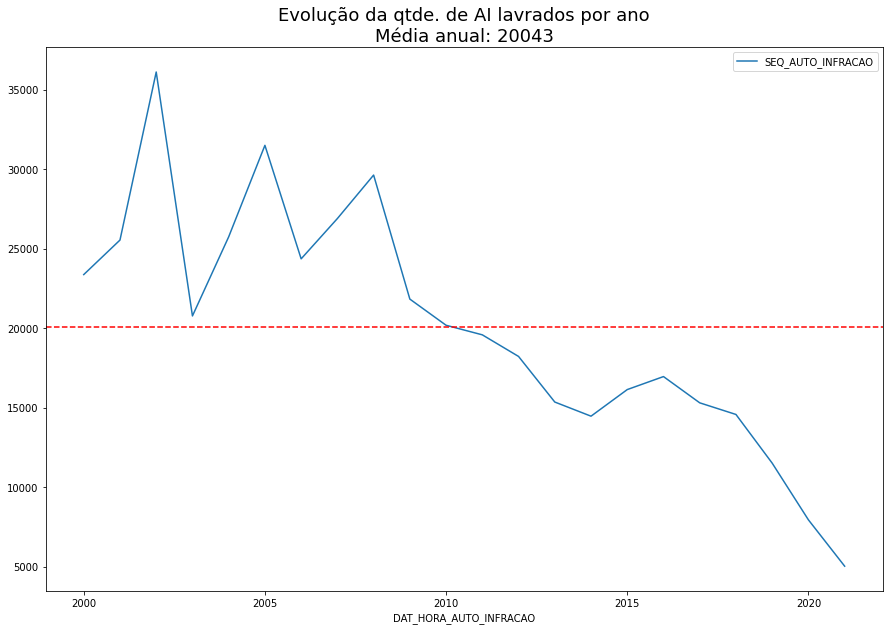

In [ ]:
fig , ax = pp.subplots()
sns.lineplot(data=df_qtde_AI_ano)
ax.set_title(f'Evolução da qtde. de AI lavrados por ano\nMédia anual: {mean:.0f}', fontsize=18)

pp.axhline(mean, color='r', linestyle='--')

**Análise**: É possível perceber uma clara tendência de redução da lavratura de AI ano após ano

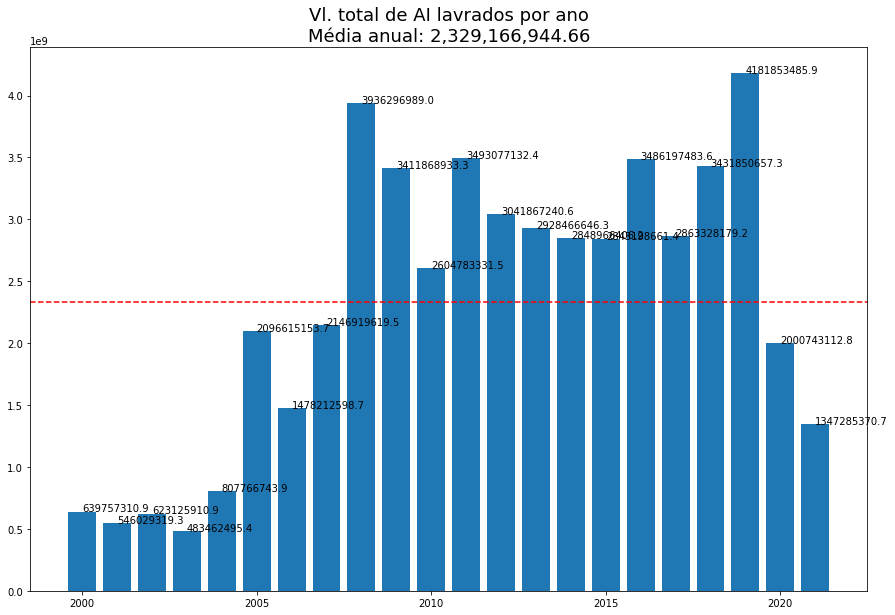

In [ ]:
df_qtde_AI_ano = pd.DataFrame(df_autos_infracao.groupby('ANO_LAVRATURA')['VAL_AUTO_INFRACAO'].sum())

pp.rcParams['figure.figsize'] = (15, 10)
#print (f'Carteira Top{n_qtde_ativos}_{s_periodo} \nTotal de saque: {vl_total_saque:,.2f}({vl_total_saque/vl_inicial*100:,.2f}%)\nMédia de saque: {vl_media_saque:,.2f} ({vl_media_saque/vl_inicial*100:,.2f}%) / Mediana de saque: {vl_mediana_saque:,.2f} ({vl_mediana_saque/vl_inicial*100:,.2f}%)')
pp.bar(x=df_qtde_AI_ano.index, height=df_qtde_AI_ano['VAL_AUTO_INFRACAO'])

for index, data in enumerate(df_qtde_AI_ano['VAL_AUTO_INFRACAO']):
    if data > 0: 
      pp.text(x=df_qtde_AI_ano.index[index], y=round(data,1)+2, s=f'{round(data,1)}')

mean = df_autos_infracao.groupby(df_autos_infracao['ANO_LAVRATURA'])['VAL_AUTO_INFRACAO'].sum().mean()

pp.axhline(mean, color='r', linestyle='--')
pp.title(f'Vl. total de AI lavrados por ano\nMédia anual: {mean:,.2f}', fontsize=18)

pp.show()

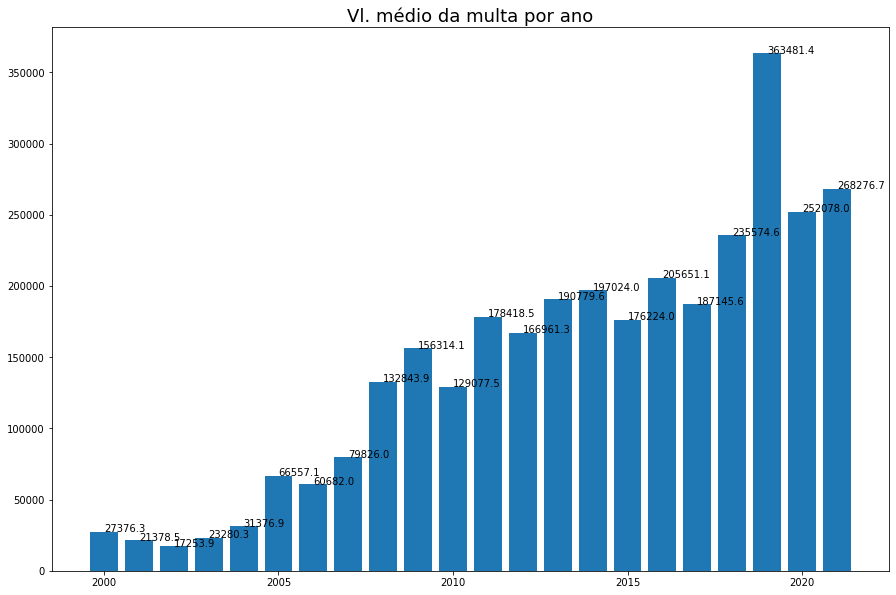

In [ ]:
df_qtde_AI_ano = pd.DataFrame(df_autos_infracao.groupby('ANO_LAVRATURA')['VAL_AUTO_INFRACAO'].mean())

pp.rcParams['figure.figsize'] = (15, 10)
pp.bar(x=df_qtde_AI_ano.index, height=df_qtde_AI_ano['VAL_AUTO_INFRACAO'])

for index, data in enumerate(df_qtde_AI_ano['VAL_AUTO_INFRACAO']):
    if data > 0: 
      pp.text(x=df_qtde_AI_ano.index[index], y=round(data,1)+2, s=f'{round(data,1)}')


pp.title(f'Vl. médio da multa por ano', fontsize=18)

pp.show()

**Análise:**
Percebe-se que, embora o número de autuações venha caindo, o valor médio das autuações tem aumentado, o que sugere que o Ibama tem adotado estratégia de fiscalização que prioriza os crimes com maiores impactos ambientais. 

Assim, enquanto no ano de 2000 foram lavrados mais de 23mil AI

In [ ]:
df_qtde_AI_ano

,SEQ_AUTO_INFRACAO
REGIAO,
CO,72564
N,111941
NE,91784
S,45380
SE,119286


        SEQ_AUTO_INFRACAO
REGIAO                   
S               10.291300
CO              16.456101
NE              20.814822
N               25.386037
SE              27.051740


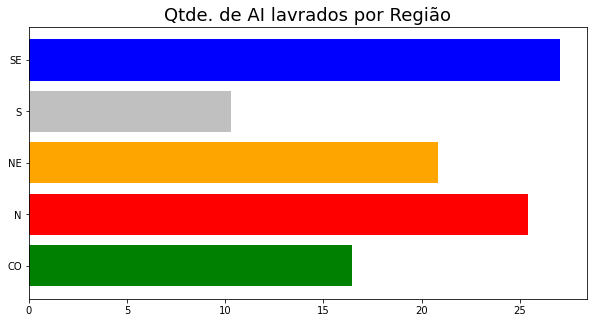

In [ ]:
qtde_total_ai = df_autos_infracao['SEQ_AUTO_INFRACAO'].count()
df_qtde_AI_ano = pd.DataFrame(df_autos_infracao.groupby('REGIAO')['SEQ_AUTO_INFRACAO'].count()/qtde_total_ai*100)

print (df_qtde_AI_ano.sort_values(by='SEQ_AUTO_INFRACAO'))

pp.rcParams['figure.figsize'] = (10, 5)
pp.barh(y=df_qtde_AI_ano.index, width=df_qtde_AI_ano['SEQ_AUTO_INFRACAO'], color=['green','red','orange','silver','blue'])
pp.title(f'Qtde. de AI lavrados por Região', fontsize=18)

pp.show()

Text(0, 0.5, 'Região')

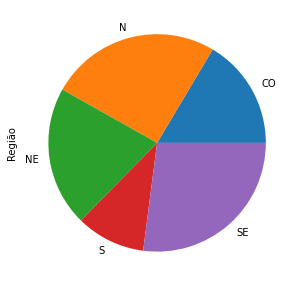

In [ ]:
fig , ax = pp.subplots()
df_qtde_AI_ano.SEQ_AUTO_INFRACAO.plot.pie()
ax.set_ylabel("Região")

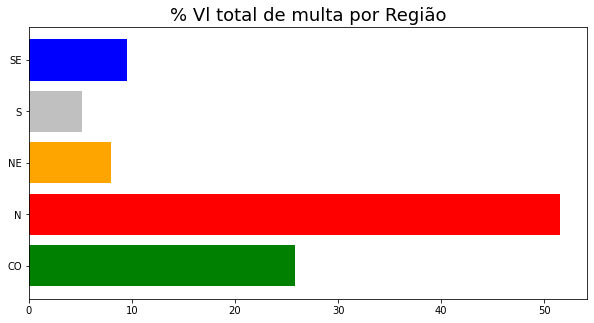

In [ ]:
vl_total_multa = df_autos_infracao['VAL_AUTO_INFRACAO'].sum()

df_qtde_AI_ano = pd.DataFrame(df_autos_infracao.groupby('REGIAO')['VAL_AUTO_INFRACAO'].sum()/vl_total_multa*100)

pp.rcParams['figure.figsize'] = (10, 5)
pp.barh(y=df_qtde_AI_ano.index, width=df_qtde_AI_ano['VAL_AUTO_INFRACAO'],color=['green','red','orange','silver','blue'])

pp.title(f'% Vl total de multa por Região', fontsize=18)

pp.show()

Text(0.5, 1.0, '% Vl. multa por Região')

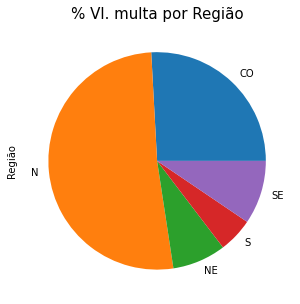

In [ ]:
fig , ax = pp.subplots()
df_qtde_AI_ano.VAL_AUTO_INFRACAO.plot.pie()
ax.set_ylabel("Região")
pp.title(f'% Vl. multa por Região', fontsize=15)

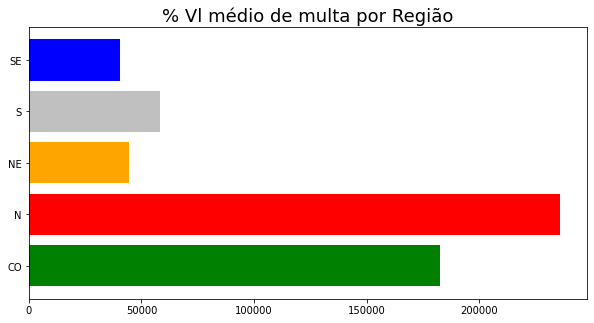

In [ ]:
df_qtde_AI_ano = pd.DataFrame(df_autos_infracao.groupby('REGIAO')['VAL_AUTO_INFRACAO'].mean())

pp.rcParams['figure.figsize'] = (10, 5)
pp.barh(y=df_qtde_AI_ano.index, width=df_qtde_AI_ano['VAL_AUTO_INFRACAO'],color=['green','red','orange','silver','blue'])
'''
for index, data in enumerate(df_qtde_AI_ano['SEQ_AUTO_INFRACAO']):
    if data > 0: 
      pp.text(x=df_qtde_AI_ano.index[index], y=round(data,1)+2, s=f'{round(data,1)}')
'''
#mean = df_autos_infracao.groupby(df_autos_infracao['REGIAO'].dt.year)['SEQ_AUTO_INFRACAO'].count().mean()

#pp.axhline(mean, color='r', linestyle='--')
pp.title(f'% Vl médio de multa por Região', fontsize=18)

pp.show()

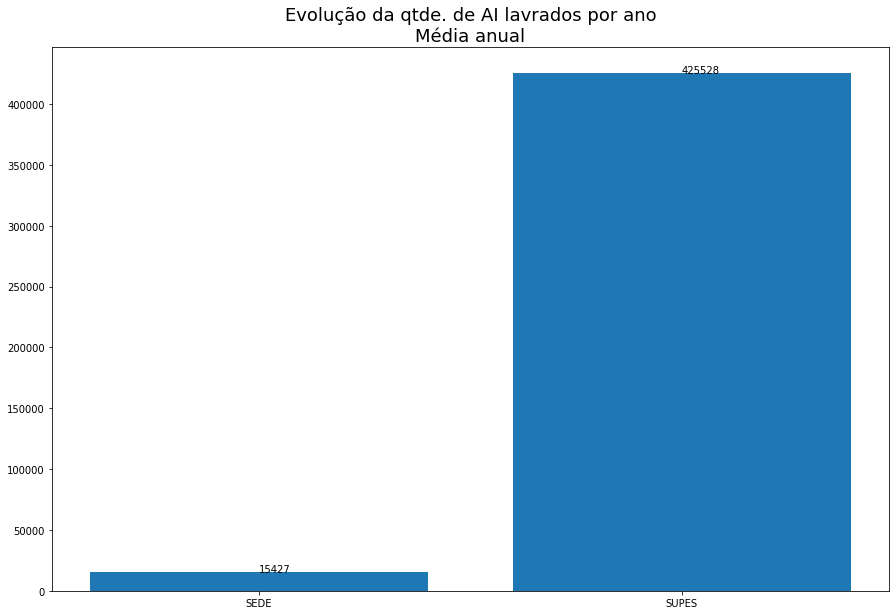

In [ ]:
df_qtde_AI_ano = pd.DataFrame(df_autos_infracao.groupby(df_autos_infracao['UNID_JULGAMENTO'])['SEQ_AUTO_INFRACAO'].count())

pp.rcParams['figure.figsize'] = (15, 10)
#print (f'Carteira Top{n_qtde_ativos}_{s_periodo} \nTotal de saque: {vl_total_saque:,.2f}({vl_total_saque/vl_inicial*100:,.2f}%)\nMédia de saque: {vl_media_saque:,.2f} ({vl_media_saque/vl_inicial*100:,.2f}%) / Mediana de saque: {vl_mediana_saque:,.2f} ({vl_mediana_saque/vl_inicial*100:,.2f}%)')
pp.bar(x=df_qtde_AI_ano.index, height=df_qtde_AI_ano['SEQ_AUTO_INFRACAO'])

for index, data in enumerate(df_qtde_AI_ano['SEQ_AUTO_INFRACAO']):
    if data > 0: 
      pp.text(x=df_qtde_AI_ano.index[index], y=round(data,1)+2, s=f'{round(data,1)}')

pp.title(f'Evolução da qtde. de AI lavrados por ano\nMédia anual', fontsize=18)

pp.show()

                 SEQ_AUTO_INFRACAO
UNID_JULGAMENTO                   
SEDE                      3.498543
SUPES                    96.501457
                 VAL_AUTO_INFRACAO
UNID_JULGAMENTO                   
SEDE                     78.029123
SUPES                    21.970877


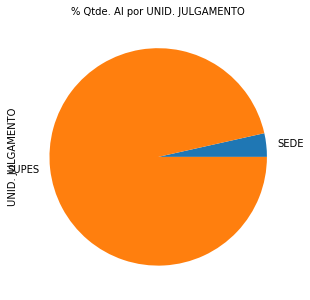

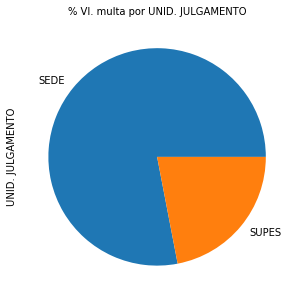

In [ ]:
qtde_total_ai = df_autos_infracao['SEQ_AUTO_INFRACAO'].count()
df_qtde_AI_ano = pd.DataFrame(df_autos_infracao.groupby('UNID_JULGAMENTO')['SEQ_AUTO_INFRACAO'].count()/qtde_total_ai*100)

pp.rcParams['figure.figsize'] = (10, 5)
print (df_qtde_AI_ano)
fig , ax = pp.subplots()
df_qtde_AI_ano.SEQ_AUTO_INFRACAO.plot.pie()
ax.set_ylabel("UNID. JULGAMENTO")
pp.title(f'% Qtde. AI por UNID. JULGAMENTO', fontsize=10)

df_qtde_AI_ano = pd.DataFrame(df_autos_infracao.groupby('UNID_JULGAMENTO')['VAL_AUTO_INFRACAO'].sum()/vl_total_multa*100)

print (df_qtde_AI_ano)
fig , ax = pp.subplots()
df_qtde_AI_ano.VAL_AUTO_INFRACAO.plot.pie()
ax.set_ylabel("UNID. JULGAMENTO")
pp.title(f'% Vl. multa por UNID. JULGAMENTO', fontsize=10)

pp.show()

In [ ]:
df_filtro_2016_2020 = df_autos_infracao[(df_autos_infracao['ANO_LAVRATURA'] >= 2016) & (df_autos_infracao['ANO_LAVRATURA'] <= 2020)]

df_dados = df_filtro_2016_2020.groupby('AJG')['SEQ_AUTO_INFRACAO'].count().reset_index()

df_dados['CARGA_JULGAMENTO_DIA'] = df_dados['SEQ_AUTO_INFRACAO']/200*5

#df_dados.loc['AJG'== 'SERVIDOR_DESIGNADO', 'CARGA_JULGAMENTO_DIA'] = df_dados['CARGA_JULGAMENTO_DIA']/200

KeyError: ignored

In [ ]:
df_qtde_AI_ano = pd.DataFrame(df_autos_infracao[df_autos_infracao['UNID_JULGAMENTO'] == 'SEDE'].groupby('ANO_LAVRATURA')['SEQ_AUTO_INFRACAO'].count())
df_qtde_AI_ano.plot(kind='bar')
'''
pp.rcParams['figure.figsize'] = (15, 10)
pp.bar(x=['UNID_JULGAMENTO', 'ANO_LAVRATURA'], height=df_qtde_AI_ano['SEQ_AUTO_INFRACAO'])

pp.title(f'Vl. médio da multa por ano', fontsize=18)
'''
pp.show()

**b) Valor das multas ambientais**

O valor médio da multa por AI no período analisado foi de R$ 231.850,77. 

Por outro lado, ao se analisar outra medida de tendência utilizada na estatística descritiva, a mediana, obtém-se o valor central de R$ 9.000,00 para os autos de infração, o que significa que metade dos autos de infração do IBAMA possuem valores até nove mil reais.

Essa expressiva diferença entre as duas medidas decorre do fato de que a média é mais suscetível a distorção por valores extremos, como são os valores das multas das infrações ambientais, que, regra geral, podem variar entre 50,00 a 50.000.000,00 de reais, conforme dispõe a Lei de Crimes Ambientais (Lei nº 9.605/1998).


Essa característica pode ser observada no gráfico a seguir, que apresenta a distribuição dos autos de infração por faixa dos valores das multas.

In [ ]:
q1 = df_autos_infracao["VAL_AUTO_INFRACAO"].quantile(.25)
print(f'Q1: {q1}')
q3 = df_autos_infracao["VAL_AUTO_INFRACAO"].quantile(.75)
print(f'Q3: {q3}')
aq = q3 - q1
print(f'Q3-Q1: {1.5*aq + q3}')

Q1: 1060.0
Q3: 16000.0
Q3-Q1: 38410.0


In [ ]:
round(df_autos_infracao.groupby(["TIPO_INFRACAO","TIPO_ACAO"])["VAL_AUTO_INFRACAO"].mean(),2)

round(df_autos_infracao.groupby(["TIPO_ACAO"])["VAL_AUTO_INFRACAO"].mean().sort_values(ascending=False),2)
round(df_autos_infracao.groupby(["TIPO_INFRACAO"])["VAL_AUTO_INFRACAO"].mean().sort_values(ascending=False),2)
round(df_autos_infracao.groupby(["TIPO_INFRACAO"])["VAL_AUTO_INFRACAO"].max().sort_values(ascending=False),2)


Series([], Name: VAL_AUTO_INFRACAO, dtype: float64)

In [ ]:
vl_minimo, vl_maximo, vl_media_multa, vl_mediana_multa = df_autos_infracao['VAL_AUTO_INFRACAO'].agg(['min', 'max', 'mean', 'median'])
print (f'Média: {vl_media_multa:.2f} \nMediana: {vl_mediana_multa:.2f}\nMínimo: {vl_minimo:.2f}\n Máximo: {vl_maximo:.2f}')


Média: 116205.98 
Mediana: 3600.00
Mínimo: 50.00
 Máximo: 169910865.00


In [ ]:
df_autos_infracao["VAL_AUTO_INFRACAO"].sort_values()

528146           50.0
508949           50.0
305065           50.0
284595           50.0
595507           50.0
             ...     
72135      92329600.0
24307     147621215.0
216629    150000000.0
120639    153184700.0
446798    169910865.0
Name: VAL_AUTO_INFRACAO, Length: 440955, dtype: float64

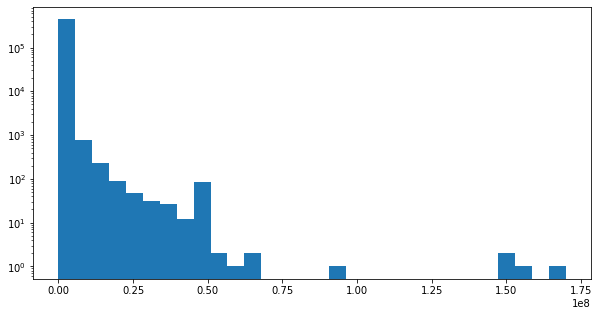

In [ ]:
fig, ax = pp.subplots()
ax.hist(df_autos_infracao["VAL_AUTO_INFRACAO"], bins=30, log=True)
pp.show()

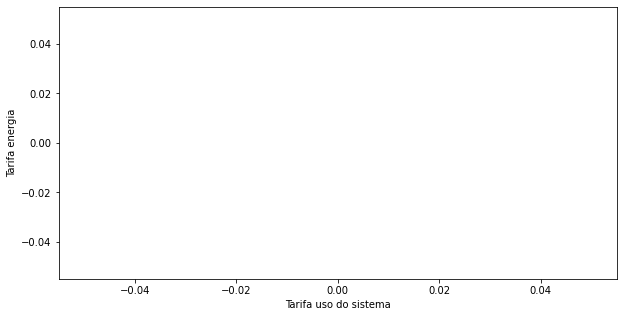

In [ ]:
fig, ax = pp.subplots()
ax.scatter(df_autos_infracao["VAL_AUTO_INFRACAO"], df_autos_infracao["TIPO_INFRACAO"])
ax.set_xlabel("Tarifa uso do sistema")
ax.set_ylabel("Tarifa energia")
pp.show()

In [ ]:
df_autos_infracao['VAL_AUTO_INFRACAO'].describe()

count    4.409560e+05
mean     1.162060e+05
std      1.187742e+06
min      5.000000e+01
25%      1.060000e+03
50%      3.600000e+03
75%      1.600000e+04
max      1.699109e+08
Name: VAL_AUTO_INFRACAO, dtype: float64

Média: 116205.98 
Mediana: 3600.00
Mínimo: 50.00
 Máximo: 169910865.00


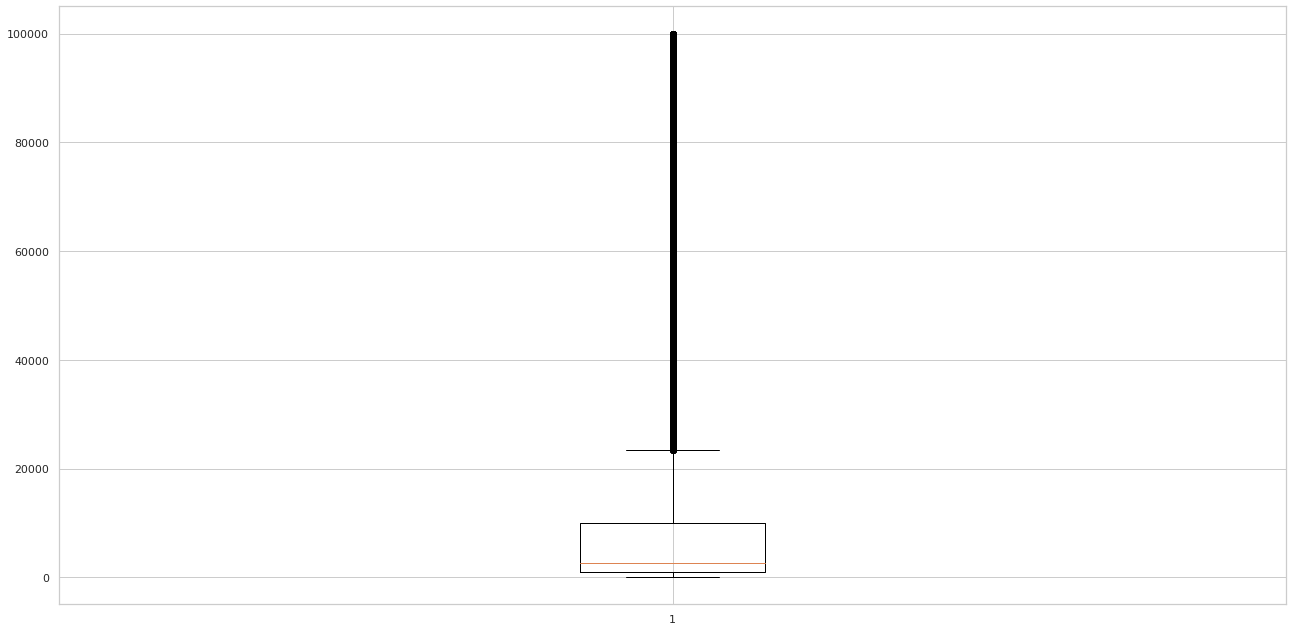

In [ ]:
vl_minimo, vl_maximo, vl_media_multa, vl_mediana_multa = df_autos_infracao['VAL_AUTO_INFRACAO'].agg(['min', 'max', 'mean', 'median'])
print (f'Média: {vl_media_multa:.2f} \nMediana: {vl_mediana_multa:.2f}\nMínimo: {vl_minimo:.2f}\n Máximo: {vl_maximo:.2f}')

#df_autos_infracao['VAL_AUTO_INFRACAO'].agg(['min', 'max', 'mean', 'median'])

'''
#Visualizaçao BOXPLOT
import seaborn as sns
sns.set_theme(style="whitegrid")
vl_multa = sns.load_dataset("df_autos_infracao")
ax = sns.boxplot(x=df_autos_infracao["VAL_AUTO_INFRACAO"])
'''
fig, ax = pp.subplots()
ax.boxplot(df_autos_infracao[df_autos_infracao['VAL_AUTO_INFRACAO']<=100000]['VAL_AUTO_INFRACAO'])
pp.show()

**d) Tipo de infração (tema ambiental) dos autos de infração**

Analisando a distribuição dos autos em função do tema ambiental, percebe-se que as infrações relacionadas à flora, como o desmatamento, representam a maioria dos autos lavrados (40%), seguido das infrações associadas ao Cadastro Técnico Federal – CTF (20%).

Combinando-se os dados dos locais de infração com a classificação dos ilícitos por tema ambiental, verifica-se a grande representatividade das infrações relativas ao desmatamento na Amazônia no contexto geral dos ilícitos ambientais, com o tema flora e os estados do PA, MT e RO tendo grande relevância nos quantitativos apresentados.

Quanto aos valores das multas, o gráfico acima mostra que o tema flora concentra 71% do montante total das multas aplicadas. Para esse grupo, a média individual de valor por AI foi de R$ 408.000,00 e a mediana R$ 60.000,00. Tal situação evidencia que esse tipo de ilícito, regra geral, possui maior grau de lesividade ao meio ambiente, uma vez que o valor da multa está associado à dimensão da infração.

Por outro lado, as infrações relativas ao Cadastro Técnico Federal, que é o segundo tema com o maior número de AI, possuem os menores valores de multa por AI, sendo a média igual a 16 mil reais e sua mediana igual a 2 mil reais.
Cabe registrar que os ilícitos vinculados ao CTF representam em sua maioria infrações na seara administrativa, com baixo impacto ambiental, tais como: “Deixar de inscrever-se no CTF”, “Deixar de apresentar relatórios ambientais exigidos na legislação” e “Apresentar informação falsa (porte econômico da empresa) no CTF”.

Por fim, destaca-se que os AI que possuem os menores valores de multa (abaixo de 2 mil reais) referem-se a infrações classificadas no tema CTF, com cerca de 40% do total de autos lavrados. Já as infrações com elevados valores de multa (acima de 100 mil reais) estão concentrados no tema flora, representando 74% do quantitativo total de AI.

Flora                                  46.150410
Fauna                                  19.988389
Controle ambiental                     13.124892
Pesca                                   9.130616
Cadastro Técnico Federal                7.327488
Outras                                  2.377108
Ecossistema                             0.902358
Org. Gen. Modific. e Biopirataria       0.455374
Unidades de conservação                 0.378269
Ordenamento urbano e Contr. patrim.     0.165096
Name: TIPO_INFRACAO, dtype: float64
TIPO_INFRACAO
Cadastro Técnico Federal                1.851764
Controle ambiental                     12.797370
Ecossistema                             0.103622
Fauna                                   3.339350
Flora                                  73.599909
Ordenamento urbano e Contr. patrim.     0.035863
Org. Gen. Modific. e Biopirataria       1.319217
Outras                                  4.297517
Pesca                                   1.556785
Unidades de conserv

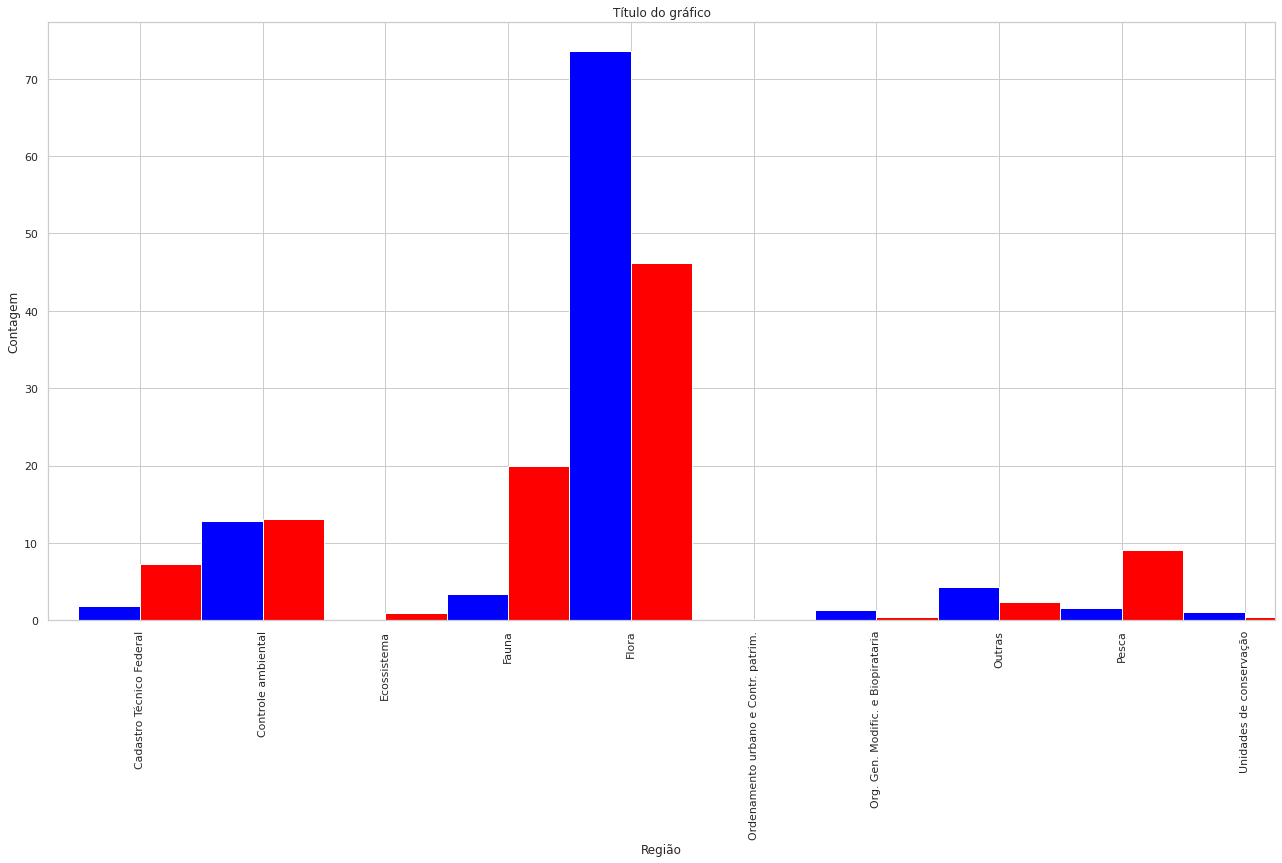

In [ ]:
qtde_total = df_autos_infracao['TIPO_INFRACAO'].count()
vl_total = df_autos_infracao['VAL_AUTO_INFRACAO'].sum()

print (df_autos_infracao['TIPO_INFRACAO'].value_counts()/qtde_total*100)
print (df_autos_infracao.groupby('TIPO_INFRACAO')['VAL_AUTO_INFRACAO'].sum()/vl_total*100)

df_autos_infracao.groupby('TIPO_INFRACAO')['VAL_AUTO_INFRACAO'].agg(['sum', 'mean'])

fig, ax = pp.subplots()
width = 1
(df_autos_infracao.groupby('TIPO_INFRACAO')['SEQ_AUTO_INFRACAO'].count()/qtde_total*100).plot.bar(color='red', position=0)
(df_autos_infracao.groupby('TIPO_INFRACAO')['VAL_AUTO_INFRACAO'].sum()/vl_total*100).plot.bar(color='blue', position=1)

ax.set_ylabel("Contagem")
ax.set_xlabel("Região")
ax.set_title("Título do gráfico")

pp.show()

In [ ]:
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

(df_autos_infracao['TIPO_INFRACAO'].value_counts()/qtde_total*100).plot(kind='bar', color='red', ax=ax, width=width, position=1)
(df_autos_infracao.groupby('TIPO_INFRACAO')['VAL_AUTO_INFRACAO'].sum()/vl_total*100).plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('Qtde')
ax2.set_ylabel('Valor')

pp.show()

In [ ]:
df_boxplot=pd.DataFrame(df_autos_infracao.groupby('TIPO_INFRACAO')['SEQ_AUTO_INFRACAO', 'VAL_AUTO_INFRACAO'].agg(['count', 'mean']))
df_boxplot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



VAL_AUTO_INFRACAO               
                                                count           mean
TIPO_INFRACAO                                                       
Cadastro Técnico Federal                        32311   29366.960358
Controle ambiental                              57875  113306.142830
Ecossistema                                      3979   13344.460503
Fauna                                           88140   19413.892186
Flora                                          203503  185323.372564
Ordenamento urbano e Contr. patrim.               728   25243.129712
Org. Gen. Modific. e Biopirataria                2008  336648.104104
Outras                                          10482  210086.045187
Pesca                                           40262   19813.303435
Unidades de conservação                          1668  337496.113735

In [ ]:
df_autos_infracao['TIPO_INFRACAO'].value_counts()

Flora                                  203503
Fauna                                   88140
Controle ambiental                      57875
Pesca                                   40262
Cadastro Técnico Federal                32311
Outras                                  10482
Ecossistema                              3979
Org. Gen. Modific. e Biopirataria        2008
Unidades de conservação                  1668
Ordenamento urbano e Contr. patrim.       728
Name: TIPO_INFRACAO, dtype: int64

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



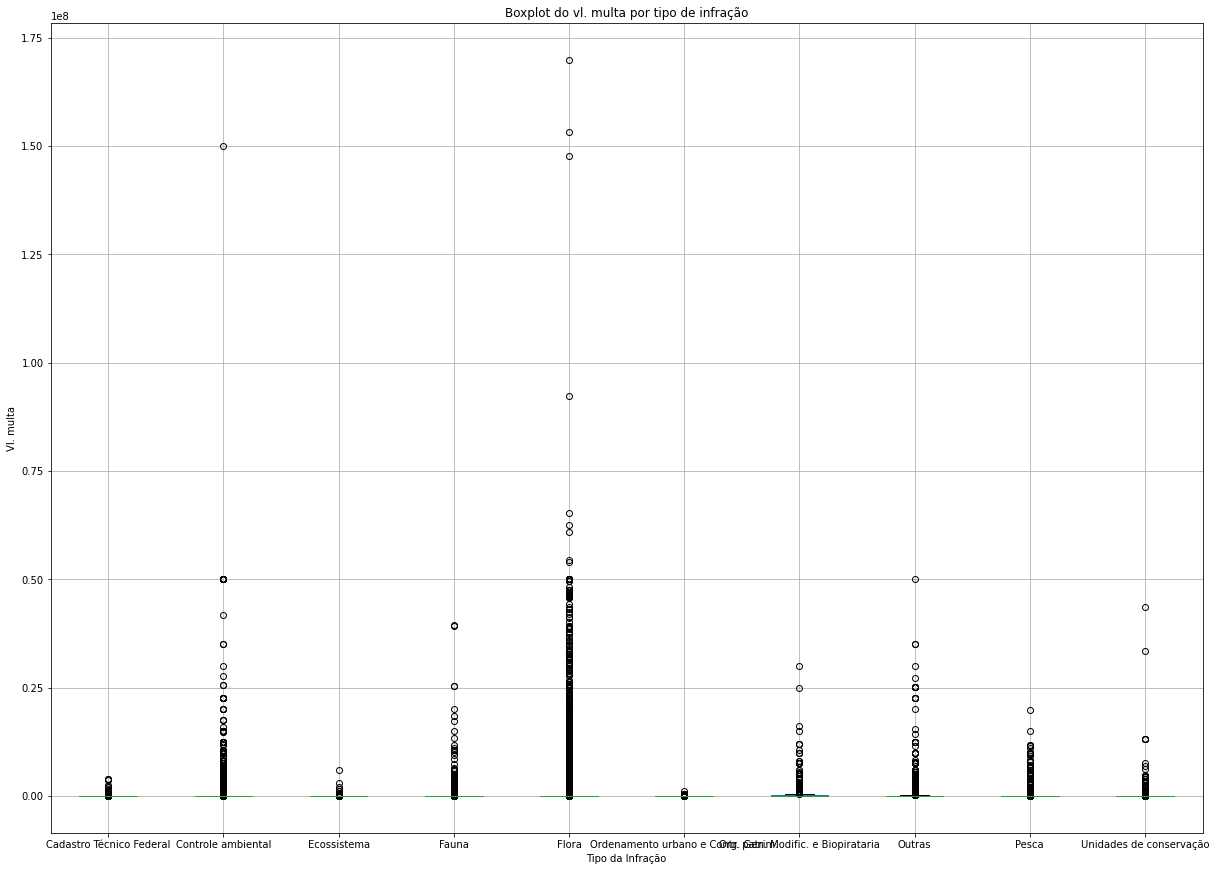

In [ ]:
#Visualizaçao de como se deu a ocupação de passageiros por Empresa Aérea, em 2021
fig, ax = pp.subplots()
df_autos_infracao.boxplot(column="VAL_AUTO_INFRACAO", by='TIPO_INFRACAO', ax=ax)
ax.set_xlabel("EMPRESA AÉREA")
ax.set_ylabel("OCUPAÇÃO")
ax.set_title("Boxplot de Taxa de Ocupação - Capacidade de Passageiros")
pp.suptitle("")
pp.show()

In [ ]:
df_qtde_AI_ano = pd.DataFrame(df_autos_infracao.groupby(df_autos_infracao['DAT_HORA_AUTO_INFRACAO'].dt.year)['SEQ_AUTO_INFRACAO'].count())

pp.rcParams['figure.figsize'] = (22, 11)
#print (f'Carteira Top{n_qtde_ativos}_{s_periodo} \nTotal de saque: {vl_total_saque:,.2f}({vl_total_saque/vl_inicial*100:,.2f}%)\nMédia de saque: {vl_media_saque:,.2f} ({vl_media_saque/vl_inicial*100:,.2f}%) / Mediana de saque: {vl_mediana_saque:,.2f} ({vl_mediana_saque/vl_inicial*100:,.2f}%)')
pp.bar(x=df_qtde_AI_ano.index, height=df_qtde_AI_ano['SEQ_AUTO_INFRACAO'])
pp.bar(x=df_qtde_AI_ano.index, height=df_qtde_AI_ano['SEQ_AUTO_INFRACAO'])

#pp.title(f'Saque Mensal - Carteira Top{n_qtde_ativos}_{s_periodo}')

for index, data in enumerate(df_qtde_AI_ano['SEQ_AUTO_INFRACAO']):
    if data > 0: 
      pp.text(x=df_qtde_AI_ano.index[index], y=round(data,1)+2, s=f'{round(data,1)}')

pp.show()

DataError: ignored

In [ ]:
df_autos_infracao.groupby(df_autos_infracao['DAT_HORA_AUTO_INFRACAO'].dt.year)['SEQ_AUTO_INFRACAO'].count().mean()

19282.260869565216

In [ ]:
#HEATMAP
df_result_ativoxperiod_retorno = df_result_ativoxperiod.pivot(columns='QTDE_ATIVOS', index='PERIODICIDADE', values='VL_RESULTADO')/1000

fig, (ax1, ax2) = pp.subplots(1, 2, figsize=(11, 4))

ax1.set_title('Retorno Acumulado AtivosxPeriodicidade')
sns.heatmap(df_result_ativoxperiod_retorno, 
            annot=True,  cmap='Blues', 
            ax=ax1, cbar=True)

ax2.set_title('DDMáx AtivosxPeriodicidade')
sns.heatmap(df_result_ativoxperiod_ddmax, 
            annot=True,  cmap='viridis',#Greens
            ax=ax2, cbar=True)

fig, ax = pp.subplots(figsize=(8, 2))
ax.set_title('FR AtivosxPeriodicidade')
sns.heatmap(df_result_ativoxperiod_FR, 
            annot=True,  cmap='Greens',
            ax=ax, cbar=True)

NameError: ignored

In [ ]:
df_autos_infracao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449824 entries, 0 to 611065
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   SEQ_AUTO_INFRACAO       443492 non-null  object        
 1   NUM_AUTO_INFRACAO       449824 non-null  object        
 2   DAT_HORA_AUTO_INFRACAO  449824 non-null  datetime64[ns]
 3   TIPO_AUTO               449784 non-null  object        
 4   TIPO_MULTA              101367 non-null  object        
 5   VAL_AUTO_INFRACAO       448340 non-null  float64       
 6   UNID_ARRECADACAO        443492 non-null  object        
 7   COD_MUNICIPIO           449824 non-null  object        
 8   MUNICIPIO               449824 non-null  object        
 9   UF                      449824 non-null  object        
 10  FORMA_ENTREGA           136484 non-null  object        
 11  DAT_CIENCIA_AUTUACAO    329217 non-null  datetime64[ns]
 12  NUM_PROCESSO            440731

In [ ]:
s_arquivo_entrada = 'bioma.csv'
df_importacao_bioma = pd.read_csv(s_googlepath_entrada + s_arquivo_entrada, 
                                  sep=';', skiprows=0, encoding='utf-8', dtype = {'BIOMA': str})
df_importacao_bioma

,SEQ_AUTO_INFRACAO,BIOMA,ULTIMA_ATUALIZACAO_RELATORIO
0,1841865,Amazonia,05/09/2021 19:00
1,1877459,Amazonia,05/09/2021 19:00
2,2046512,Amazonia,05/09/2021 19:00
3,2047127,Amazonia,05/09/2021 19:00
4,2045672,Amazonia,05/09/2021 19:00
...,...,...,...
196193,2040198,Pantanal,05/09/2021 19:00
196194,1876210,Pantanal,05/09/2021 19:00
196195,1913491,Pantanal,05/09/2021 19:00
196196,1940773,Pantanal,05/09/2021 19:00


In [ ]:
df_autos_infracao.merge(df_importacao_bioma, how='left',on='SEQ_AUTO_INFRACAO')

,SEQ_AUTO_INFRACAO,NUM_AUTO_INFRACAO,DAT_HORA_AUTO_INFRACAO,TIPO_AUTO,TIPO_MULTA,VAL_AUTO_INFRACAO,UNID_ARRECADACAO,COD_MUNICIPIO,MUNICIPIO,UF,FORMA_ENTREGA,DAT_CIENCIA_AUTUACAO,NUM_PROCESSO,NOME_INFRATOR,CPF_CNPJ_INFRATOR,CLASSIFICACAO_AREA,COD_INFRACAO,TIPO_INFRACAO,ACAO_FISCALIZATORIA,UNID_CONTROLE,TIPO_ACAO,OPERACAO,ORDEM_FISCALIZACAO
0,3,26363,2004-03-05,Multa simples,NaN,1500.0,IMP/GEREX,2105302,IMPERATRIZ,MA,NaN,2004-03-05,0205100001204,PALADAR IOGURTE LTDA,01790868000103,NaN,401001,Flora,NaN,IMP/GEREX,Rotina,NaN,NaN
1,4,26364,2004-03-05,Multa simples,NaN,1500.0,IMP/GEREX,2105302,IMPERATRIZ,MA,NaN,2004-03-05,0205100001104,PALADAR IOGURTE LTDA,01790868000103,NaN,606002,Controle ambiental,NaN,IMP/GEREX,NaN,NaN,NaN
2,5,26365,2004-05-11,Multa simples,NaN,2500.0,IMP/GEREX,2100600,AMARANTE DO MARANHAO,MA,NaN,2004-05-11,0205100007104,CERAMICA GABRIELA LTDA - ME,04352741000192,NaN,401001,Flora,NaN,IMP/GEREX,NaN,NaN,NaN
3,7,26367,2004-11-04,Multa simples,NaN,200.0,IMP/GEREX,2104057,ESTREITO,MA,NaN,NaT,0205100026204,Deusivan Cavalcante Ferreira,***909373**,NaN,422001,Flora,NaN,IMP/GEREX,NaN,NaN,NaN
4,9,26369,2004-11-04,Multa simples,NaN,600.0,IMP/GEREX,2104057,ESTREITO,MA,NaN,NaT,0205100026304,FRANCISCO COELHO DA SILVA,***185942**,NaN,422001,Flora,NaN,IMP/GEREX,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604716,2049520,7MZH5PA4,2021-09-01,Multa simples,Aberta,63400.0,ESEC TAMOIOS,3303807,PARATI,RJ,AR,NaT,NaN,Ana Eloisa Barra Justino,***877317**,Unidade de Conservação de Proteção Integral,709999,Pesca,"26872138,0",ESEC TAMOIOS,Operação,NaN,RJ058252
604717,2049521,XRY7STNZ,2021-08-26,Multa simples,Aberta,2010500.0,RR/SUPES,1400100,BOA VISTA,RR,Pessoalmente,2021-08-26,02025001086202178,FILIPE JOSÉ DA SILVA GALVÃO,***005522**,PROPRIEDADE PARTICULAR,910005,Outras,"26872139,0",RR/SUPES,Operação,NaN,RR053411
604718,2049522,H0U6PZ9Y,2021-08-26,Multa simples,Aberta,620500.0,RR/SUPES,1400100,BOA VISTA,RR,Pessoalmente,2021-08-26,02025001087202112,RODRIGO MARTINS DE MELLO,***345559**,Outras áreas,609998,Controle ambiental,"26872140,0",RR/SUPES,Operação,NaN,RR053411
604719,2049523,LLPNWTNV,2021-08-27,Multa simples,Aberta,16500.0,RR/SUPES,1400100,BOA VISTA,RR,Pessoalmente,2021-08-27,02025001088202167,CATARATAS POCOS ARTESIANOS LTDA,01789289000132,Outras áreas,910004,Outras,"26872141,0",RR/SUPES,Operação,NaN,RR053411


In [ ]:
df_autos_infracao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440956 entries, 0 to 604720
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   SEQ_AUTO_INFRACAO       440956 non-null  object        
 1   NUM_AUTO_INFRACAO       440956 non-null  object        
 2   DAT_HORA_AUTO_INFRACAO  440956 non-null  datetime64[ns]
 3   TIPO_AUTO               440956 non-null  object        
 4   TIPO_MULTA              94994 non-null   object        
 5   VAL_AUTO_INFRACAO       440956 non-null  float64       
 6   UNID_ARRECADACAO        440956 non-null  object        
 7   COD_MUNICIPIO           440956 non-null  object        
 8   MUNICIPIO               440956 non-null  object        
 9   UF                      440956 non-null  object        
 10  FORMA_ENTREGA           129946 non-null  object        
 11  DAT_CIENCIA_AUTUACAO    327741 non-null  datetime64[ns]
 12  NUM_PROCESSO            435360

**c) Unidades de lavratura e locais das infrações ambientais**
Na análise da distribuição dos AI pelo local de cometimento do ilícito, nota-se que os Estados do Pará, Mato Grosso, Rondônia e Amazonas possuem significativa relevância em termos quantitativos e de valores. Juntos, os quatro Estados detêm 35% do total de AI lavrados e 73% do montante total do valor das multas aplicadas.

Já em relação à unidade responsável pela lavratura dos AI, a maior relevância é da Sede do IBAMA em Brasília, que elaborou 45% do total de autos de infração no período. Dentre as operações realizadas pela Sede que explicam a elevada quantidade de autos, destaca-se a Operação Controle Remoto, que usa imagens de satélite e outras informações georreferenciadas para identificar infrações ambientais a partir do escritório do Instituto e enviá-las por correio ao autuado, bem como as fiscalizações relacionadas ao Cadastro Técnico Federal - CTF.

Em termos de valores, a Sede e as Superintendências Estaduais do PA e MT lavraram cerca de 14 bilhões de reais em multas, concentrando 76% do valor total aplicado.

In [ ]:
Locais de lavratura e valor IN 

SyntaxError: ignored

**6. CONCLUSÕES**
---
É importante observar que a fiscalização ambiental, em sentido amplo, é um processo sistêmico, cuja capacidade de gerar dissuasão nos infratores depende de diversas variáveis, entre as quais está a certeza e celeridade das sanções aplicadas.

Portanto, em futuras etapas do trabalho deve-se analisar a etapas posteriores do trabalho estudo sobre o processo de fiscalização implica em anovas etapas do trabalho 



In [ ]:
,
